Chapter 10

# 二元函数
Book_3《数学要素》 | 鸢尾花书：从加减乘除到机器学习 (第二版)

这段代码定义并可视化了一个二元函数 $f(x, y)$ 的多种投影和切片视图，展示了函数在三维空间中的形状和在特定值下的行为。函数定义如下：

$$
f(x, y) = 3(1 - x)^2 e^{-(x^2) - (y + 1)^2} - 10 \left(\frac{x}{5} - x^3 - y^5\right)e^{-x^2 - y^2} - \frac{1}{3} e^{-(x + 1)^2 - y^2}
$$

### 功能步骤

1. **三维表面图绘制**：首先绘制了函数 $f(x, y)$ 的三维表面图，展示了函数在平面 $x-y$ 上的形状，并使用灰色网格来显示整体趋势。

2. **特定 $y$ 值的切片视图**：针对固定的 $y$ 值（$y = -3, -2, -1, 0, 1, 2, 3$），在 $x$ 方向上观察函数$f(x, y)$ 的形状。对于每个 $y$ 值，将函数简化并作图，使得可以看到函数在 $y$ 定值条件下的 $x$ 方向变化。

3. **将函数表面沿 $y$ 投影到 $x-z$ 平面**：将整个三维表面沿$y$方向投影到$x-z$平面，并在平面上添加60条等高线，直观地展示了函数在不同$x$值下的高度分布。

4. **特定 $x$ 值的切片视图**：类似于$y$的切片视图，固定$x$值（$x = -3, -2, -1, 0, 1, 2, 3$）并绘制$f(x, y)$ 随$y$变化的曲线。这样可以观察在$x$为定值的情况下，函数如何随$y$变化。

5. **沿$x$投影到$y-z$平面**：将函数表面沿$x$方向投影到$y-z$平面，并在$z$方向添加等高线，展示了沿$x$轴的高度变化趋势。

6. **将函数投影到$x-y$平面**：在$x-y$平面上使用等高线和颜色填充的方式展示$f(x, y)$，通过色谱`RdYlBu_r`展示不同的高度区域，使得平面投影的结构更清晰。

### 可视化意义
代码的多层次切片和投影视图使我们能够全面理解二元函数$f(x, y)$的空间分布和变化情况。通过将函数在不同方向投影并绘制不同参数的切片，可以从多个角度了解函数在三维空间中的特性，如在特定坐标轴方向上的变化趋势和在不同平面中的等高线结构。这些图形是理解复杂函数行为和特征的有效工具，有助于在视觉上分析函数在多维空间中的分布和相互关系。

## 导入包

In [1]:
import numpy as np  # 导入numpy库，用于数值计算
from sympy import lambdify, diff, exp, latex, simplify  # 导入SymPy库中的相关函数
from sympy.abc import x, y  # 定义符号变量x和y
from matplotlib import pyplot as plt  # 导入matplotlib库，用于绘图
from matplotlib import cm  # 导入matplotlib的cm模块，用于颜色映射

## 定义网格

In [2]:
num = 301  # 网格数量
x_array = np.linspace(-3, 3, num)  # x轴坐标范围
y_array = np.linspace(-3, 3, num)  # y轴坐标范围
xx, yy = np.meshgrid(x_array, y_array)  # 生成二维网格

## 定义目标函数 f(x, y)

In [3]:
f_xy =  3*(1 - x)**2 * exp(-x**2 - (y + 1)**2) \
        - 10*(x/5 - x**3 - y**5) * exp(-x**2 - y**2) \
        - 1/3 * exp(-(x + 1)**2 - y**2)  # 定义目标函数 f(x, y)
f_xy  # 输出目标函数

3*(1 - x)**2*exp(-x**2 - (y + 1)**2) - (-10*x**3 + 2*x - 10*y**5)*exp(-x**2 - y**2) - 0.333333333333333*exp(-y**2 - (x + 1)**2)

In [4]:
f_xy_fcn = lambdify([x, y], f_xy)  # 将符号函数f_xy转换为可计算的数值函数
f_xy_zz = f_xy_fcn(xx, yy)  # 计算网格中每个点的f_xy值

## 绘制三维表面图

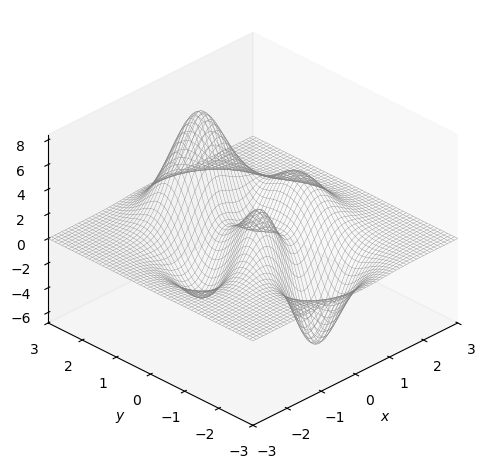

In [5]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})  # 创建三维坐标轴

ax.plot_wireframe(xx, yy, f_xy_zz, color=[0.5, 0.5, 0.5], rstride=5, cstride=5, linewidth=0.25)  # 绘制网格线
ax.set_proj_type('ortho')  # 设置正交投影
ax.set_xlabel('$x$')  # 设置x轴标签
ax.set_ylabel('$y$')  # 设置y轴标签
ax.set_zlabel('$f(x,y)$')  # 设置z轴标签
ax.set_xlim(xx.min(), xx.max())  # 设置x轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置y轴范围
ax.view_init(azim=-135, elev=30)  # 设置视角
plt.tight_layout()  # 自动调整布局
ax.grid(False)  # 关闭网格
plt.show()  # 显示图形

## 固定y值绘制切片

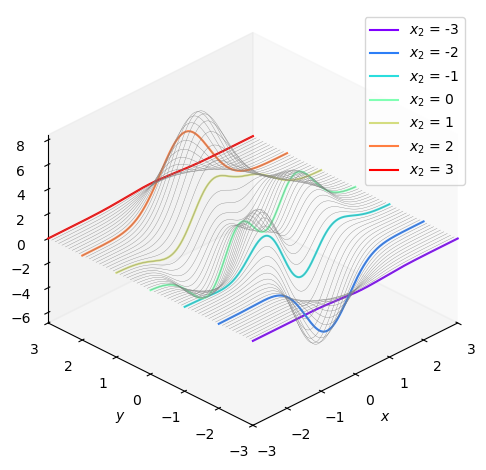

In [6]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})  # 创建三维坐标轴

ax.plot_wireframe(xx, yy, f_xy_zz, color=[0.5, 0.5, 0.5], rstride=5, cstride=0, linewidth=0.25)  # 绘制三维网格
colors = plt.cm.rainbow(np.linspace(0, 1, 7))  # 生成7种颜色

i = 0  # 设置颜色索引
for b in [-3, -2, -1, 0, 1, 2, 3]:  # 遍历不同的y值
    f_xy_b = f_xy.subs(y, b)  # 将y替换为定值b
    f_xy_b_fcn = lambdify([x], f_xy_b)  # 将f(x, y=b)转换为数值函数
    f_xy_b_zz = f_xy_b_fcn(x_array)  # 计算f(x, y=b)在x轴的值

    ax.plot(x_array, x_array*0 + b, f_xy_b_zz, color=colors[i, :], label='$x_2$ = %0.0f' % b)  # 绘制该y值下的切片曲线
    i += 1  # 增加颜色索引

plt.legend()  # 添加图例
ax.set_proj_type('ortho')  # 设置正交投影
ax.set_xlabel('$x$')  # 设置x轴标签
ax.set_ylabel('$y$')  # 设置y轴标签
ax.set_zlabel('$f(x,y)$')  # 设置z轴标签
ax.set_xlim(xx.min(), xx.max())  # 设置x轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置y轴范围
ax.view_init(azim=-135, elev=30)  # 设置视角
plt.tight_layout()  # 自动调整布局
ax.grid(False)  # 关闭网格
plt.show()  # 显示图形

## 沿y方向投影到x-z平面

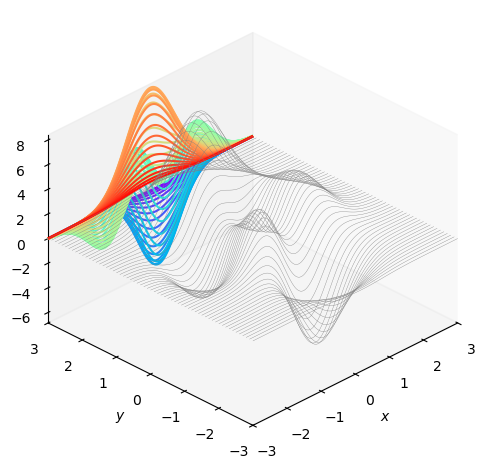

In [7]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})  # 创建三维坐标轴

ax.plot_wireframe(xx, yy, f_xy_zz, rstride=5, cstride=0, color=[0.5, 0.5, 0.5], linewidth=0.25)  # 绘制网格线
ax.contour(xx, yy, f_xy_zz, levels=60, zdir='y', offset=yy.max(), cmap='rainbow')  # 添加等高线并沿y方向投影

ax.set_xlabel('$x$')  # 设置x轴标签
ax.set_ylabel('$y$')  # 设置y轴标签
ax.set_zlabel('$f(x,y)$')  # 设置z轴标签
ax.set_proj_type('ortho')  # 设置正交投影
ax.view_init(azim=-135, elev=30)  # 设置视角
ax.grid(False)  # 关闭网格
ax.set_xlim(xx.min(), xx.max())  # 设置x轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置y轴范围
plt.tight_layout()  # 自动调整布局
plt.show()  # 显示图形

## 将下采样的曲线沿y方向投影到x-z平面

In [8]:
down_step = 2  # 下采样步长
y_array_downsample = y_array[0::down_step]  # 沿y轴方向进行下采样

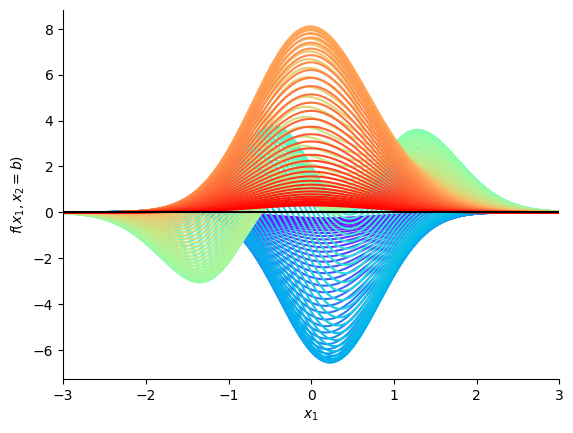

In [9]:
fig, ax = plt.subplots()  # 创建二维图形

colors = plt.cm.rainbow(np.linspace(0, 1, len(y_array_downsample)))  # 生成颜色映射

for i in np.linspace(1, len(y_array_downsample), len(y_array_downsample)):  # 遍历下采样后的y值
    plt.plot(x_array, f_xy_zz[(int(i) - 1) * down_step, :], color=colors[int(i) - 1])  # 绘制该y值的曲线

plt.axhline(y=0, color='k', linestyle='-')  # 绘制x轴
ax.spines['right'].set_visible(False)  # 隐藏右侧边框
ax.spines['top'].set_visible(False)  # 隐藏顶部边框
plt.xlabel('$x_1$')  # 设置x轴标签
plt.ylabel('$f(x_1, x_2 = b)$')  # 设置y轴标签
ax.set_xlim(xx.min(), xx.max())  # 设置x轴范围
plt.show()  # 显示图形

## 固定x值绘制切片

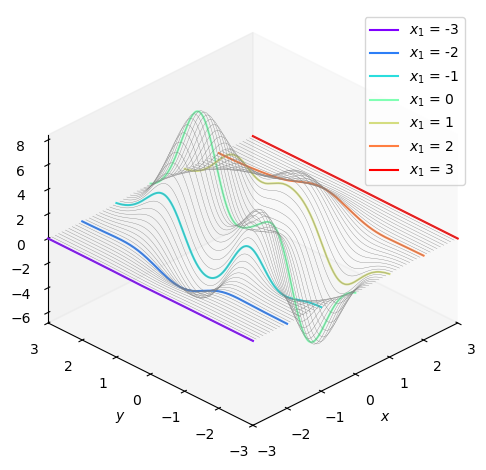

In [10]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})  # 创建三维坐标轴

ax.plot_wireframe(xx, yy, f_xy_zz, color=[0.5, 0.5, 0.5], rstride=0, cstride=5, linewidth=0.25)  # 绘制三维网格
colors = plt.cm.rainbow(np.linspace(0, 1, 7))  # 生成7种颜色

i = 0  # 设置颜色索引
for a in [-3, -2, -1, 0, 1, 2, 3]:  # 遍历不同的x值
    f_x_a_y = f_xy.subs(x, a)  # 将x替换为定值a
    f_x_a_y_fcn = lambdify([y], f_x_a_y)  # 将f(x=a, y)转换为数值函数
    f_x_a_y_zz = f_x_a_y_fcn(y_array)  # 计算f(x=a, y)在y轴的值

    ax.plot(y_array * 0 + a, y_array, f_x_a_y_zz, color=colors[i, :], label='$x_1$ = %0.0f' % a)  # 绘制该x值下的切片曲线
    i += 1  # 增加颜色索引

plt.legend()  # 添加图例
ax.set_proj_type('ortho')  # 设置正交投影
ax.set_xlabel('$x$')  # 设置x轴标签
ax.set_ylabel('$y$')  # 设置y轴标签
ax.set_zlabel('$f(x,y)$')  # 设置z轴标签
ax.set_xlim(xx.min(), xx.max())  # 设置x轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置y轴范围
ax.view_init(azim=-135, elev=30)  # 设置视角
plt.tight_layout()  # 自动调整布局
ax.grid(False)  # 关闭网格
plt.show()  # 显示图形

## 沿x方向投影到y-z平面

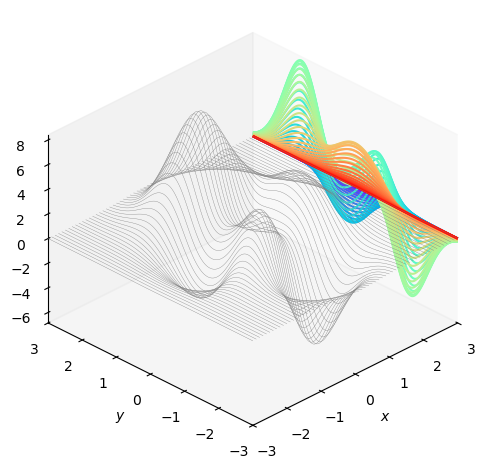

In [11]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})  # 创建三维坐标轴

ax.plot_wireframe(xx, yy, f_xy_zz, rstride=0, cstride=5, color=[0.5, 0.5, 0.5], linewidth=0.25)  # 绘制网格线
ax.contour(xx, yy, f_xy_zz, levels=60, zdir='x', offset=xx.max(), cmap='rainbow')  # 添加等高线并沿x方向投影

ax.set_xlabel('$x$')  # 设置x轴标签
ax.set_ylabel('$y$')  # 设置y轴标签
ax.set_zlabel('$f(x,y)$')  # 设置z轴标签
ax.set_proj_type('ortho')  # 设置正交投影
ax.view_init(azim=-135, elev=30)  # 设置视角
ax.grid(False)  # 关闭网格
ax.set_xlim(xx.min(), xx.max())  # 设置x轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置y轴范围
plt.tight_layout()  # 自动调整布局
plt.show()  # 显示图形

## 沿z方向投影到x-y平面并绘制等高线图

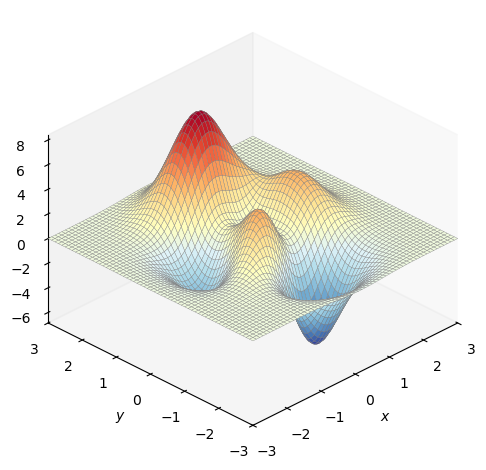

In [12]:
# 创建三维表面图并沿z轴方向投影到x-y平面
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})  # 创建三维坐标轴

ax.plot_surface(xx, yy, f_xy_zz, cmap=cm.RdYlBu_r, rstride=5, cstride=5, linewidth=0.25, edgecolors=[0.5, 0.5, 0.5])  # 绘制表面图
ax.set_proj_type('ortho')  # 设置正交投影
ax.set_xlabel('$x$')  # 设置x轴标签
ax.set_ylabel('$y$')  # 设置y轴标签
ax.set_zlabel('$f(x,y)$')  # 设置z轴标签
ax.set_xlim(xx.min(), xx.max())  # 设置x轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置y轴范围
ax.view_init(azim=-135, elev=30)  # 设置视角
plt.tight_layout()  # 自动调整布局
ax.grid(False)  # 关闭网格
plt.show()  # 显示图形

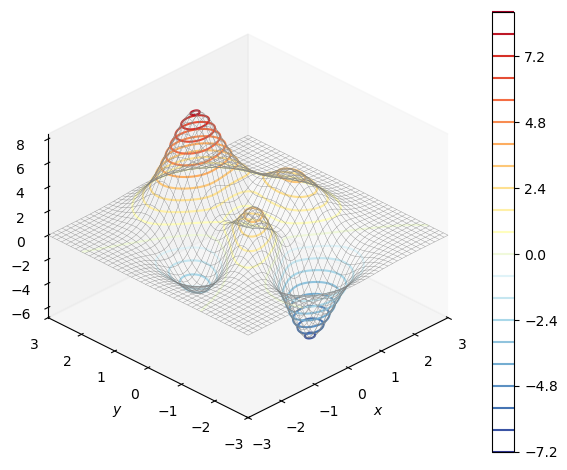

In [13]:
# 创建等高线图并绘制颜色填充
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})  # 创建三维坐标轴
ax.plot_wireframe(xx, yy, f_xy_zz, color=[0.5, 0.5, 0.5], linewidth=0.25)  # 绘制网格线

# 在z轴方向投影并绘制等高线图
colorbar = ax.contour(xx, yy, f_xy_zz, 20, cmap='RdYlBu_r')  # 使用20个等高线级别
fig.colorbar(colorbar, ax=ax)  # 添加颜色条

ax.set_proj_type('ortho')  # 设置正交投影
ax.set_xlabel('$x$')  # 设置x轴标签
ax.set_ylabel('$y$')  # 设置y轴标签
ax.set_zlabel('$f(x,y)$')  # 设置z轴标签
plt.tight_layout()  # 自动调整布局
ax.set_xlim(xx.min(), xx.max())  # 设置x轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置y轴范围
ax.view_init(azim=-135, elev=30)  # 设置视角
ax.grid(False)  # 关闭网格
plt.show()  # 显示图形

## 绘制在x-y平面的等高线图

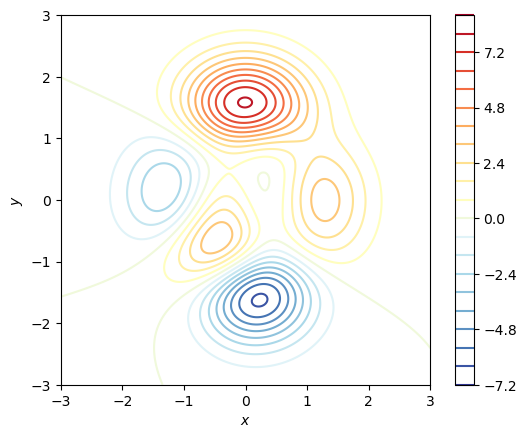

In [14]:
fig, ax = plt.subplots()  # 创建二维图形
colorbar = ax.contour(xx, yy, f_xy_zz, 20, cmap='RdYlBu_r')  # 绘制颜色填充等高线
fig.colorbar(colorbar, ax=ax)  # 添加颜色条

ax.set_xlim(xx.min(), xx.max())  # 设置x轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置y轴范围
ax.set_xlabel('$x$')  # 设置x轴标签
ax.set_ylabel('$y$')  # 设置y轴标签
plt.gca().set_aspect('equal', adjustable='box')  # 设置坐标轴比例
plt.show()  # 显示图形

## 绘制网格线并在z轴方向投影

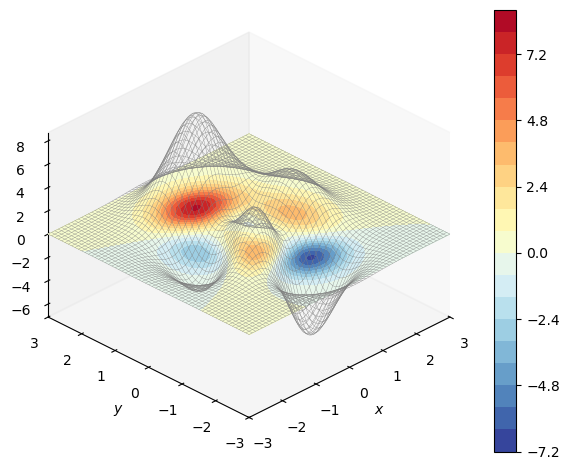

In [15]:
fig, ax = plt.subplots(subplot_kw={'projection': '3d'})  # 创建三维坐标轴
ax.plot_wireframe(xx, yy, f_xy_zz, rstride=5, cstride=5, color=[0.5, 0.5, 0.5], linewidth=0.25)  # 绘制网格线

# 在z轴方向投影并绘制填充等高线
colorbar = ax.contourf(xx, yy, f_xy_zz, levels=20, zdir='z', offset=0, cmap='RdYlBu_r')  # 使用20个等高线级别
fig.colorbar(colorbar, ax=ax)  # 添加颜色条

ax.set_xlabel('$x$')  # 设置x轴标签
ax.set_ylabel('$y$')  # 设置y轴标签
ax.set_zlabel('$f(x,y)$')  # 设置z轴标签
ax.set_proj_type('ortho')  # 设置正交投影
ax.view_init(azim=-135, elev=30)  # 设置视角
ax.grid(False)  # 关闭网格
ax.set_xlim(xx.min(), xx.max())  # 设置x轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置y轴范围
plt.tight_layout()  # 自动调整布局
plt.show()  # 显示图形

## 在x-y平面上绘制颜色填充的等高线图

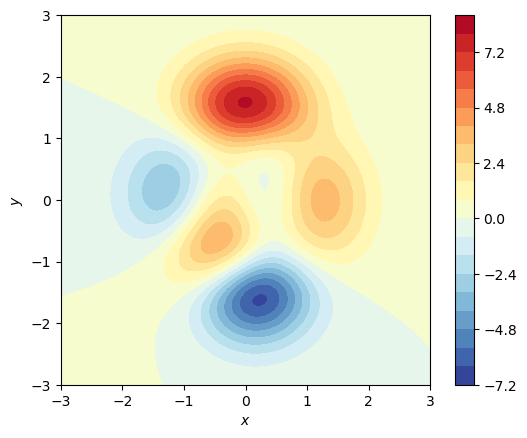

In [16]:
fig, ax = plt.subplots()  # 创建二维图形
colorbar = ax.contourf(xx, yy, f_xy_zz, 20, cmap='RdYlBu_r')  # 使用20个等高线级别绘制颜色填充
fig.colorbar(colorbar, ax=ax)  # 添加颜色条

ax.set_xlim(xx.min(), xx.max())  # 设置x轴范围
ax.set_ylim(yy.min(), yy.max())  # 设置y轴范围
ax.set_xlabel('$x$')  # 设置x轴标签
ax.set_ylabel('$y$')  # 设置y轴标签
plt.gca().set_aspect('equal', adjustable='box')  # 设置坐标轴比例
plt.show()  # 显示图形